# Basic GP, Marginal Likelihood

In [1]:
%matplotlib inline
import numpy as np
import theano
import theano.tensor as tt
import sys
sys.path.insert(0, "../../..")
import pymc3 as pm

# define gp, true parameter values
with pm.Model() as model:
    l = 0.2 
    tau = 2.0 
    cov = tau * pm.gp.cov.RBF(1, l)

n = 30
X = np.sort(np.random.rand(n))[:,None]
K = theano.function([], cov.K(X, X))()

# generate fake data from GP with white noise (with variance sigma2)
sigma2 = 0.1 
y = np.random.multivariate_normal(np.zeros(n), K + sigma2 * np.eye(n))

using gaussian-processes fork


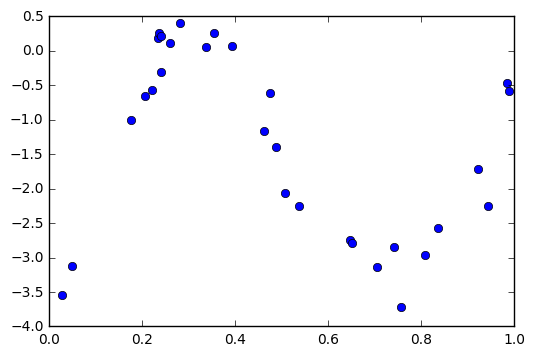

In [2]:
plt.plot(X, y, 'o')

In [3]:
# infer gp parameter values
with pm.Model() as model:
    l = pm.HalfNormal('l')
    sigma2 = pm.HalfNormal('sigma2')
    tau = pm.HalfNormal('tau')

    f_cov = tau * pm.gp.cov.RBF(1, l)
    n_cov = sigma2 * tt.eye(n)

    y_obs = pm.gp.GP('y_obs', mu=0.0, cov=f_cov.K(X,X) + n_cov, observed=y)


In [4]:
with model:
    trace = pm.sample(2000, init='map', step=pm.Slice())

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
100%|██████████| 2000/2000 [00:19<00:00, 103.43it/s]


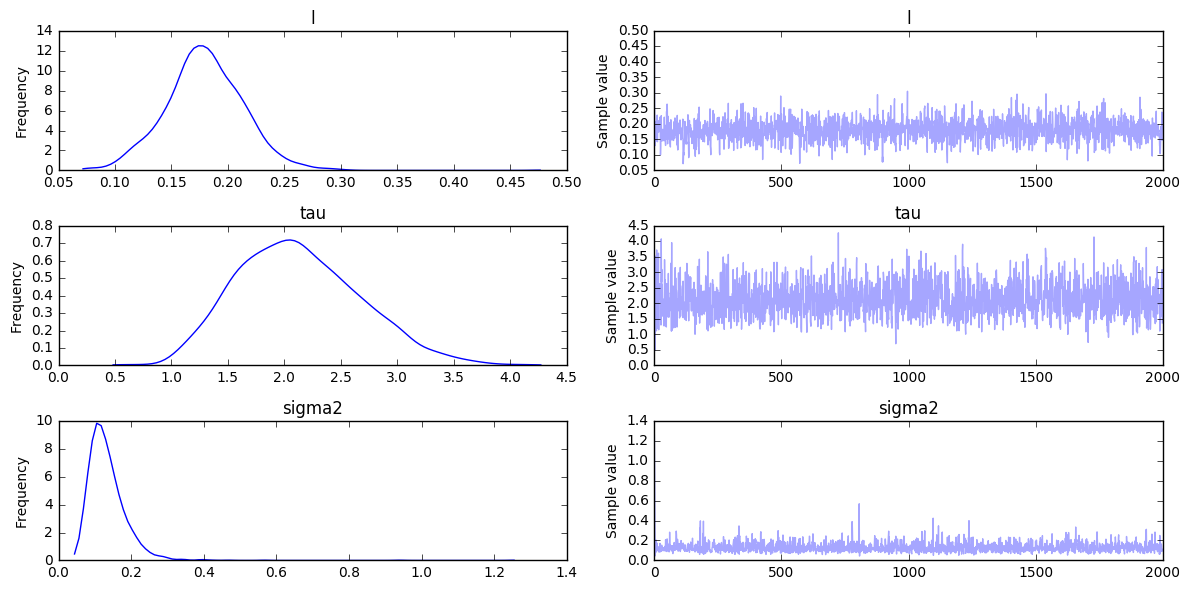

In [5]:
pm.traceplot(trace, varnames=['l', 'tau', 'sigma2']);